In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Preview the datasets
print("Customers Dataset:")
print(customers.head())

print("\nProducts Dataset:")
print(products.head())

print("\nTransactions Dataset:")
print(transactions.head())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [3]:
# Merge transactions with customers
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='left')

# Merge the result with products
full_data = pd.merge(transactions_customers, products, on='ProductID', how='left')

# Preview the merged dataset
print("\nMerged Dataset:")
print(full_data.head())



Merged Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving 

In [4]:
# Top-selling products
top_products = full_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Quantity Sold:")
print(top_products)

# Revenue by region
revenue_by_region = full_data.groupby('Region')['TotalValue'].sum()
print("\nRevenue by Region:")
print(revenue_by_region)

# Most popular categories
popular_categories = full_data['Category'].value_counts()
print("\nMost Popular Categories:")
print(popular_categories)



Top 10 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64

Revenue by Region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

Most Popular Categories:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


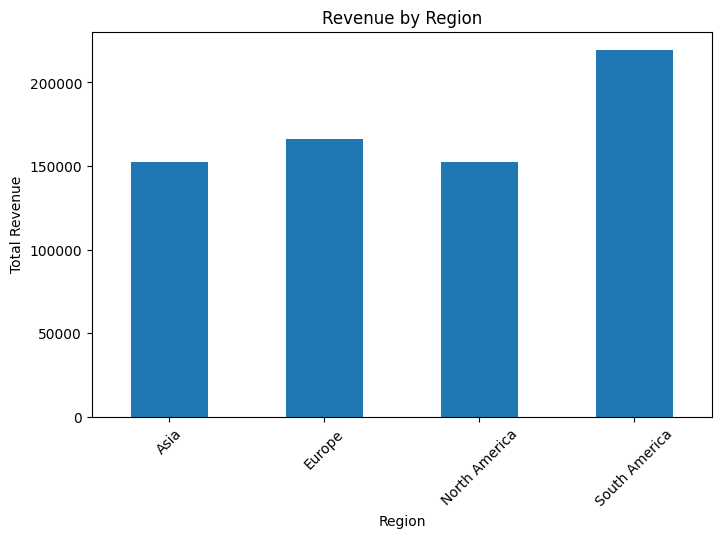

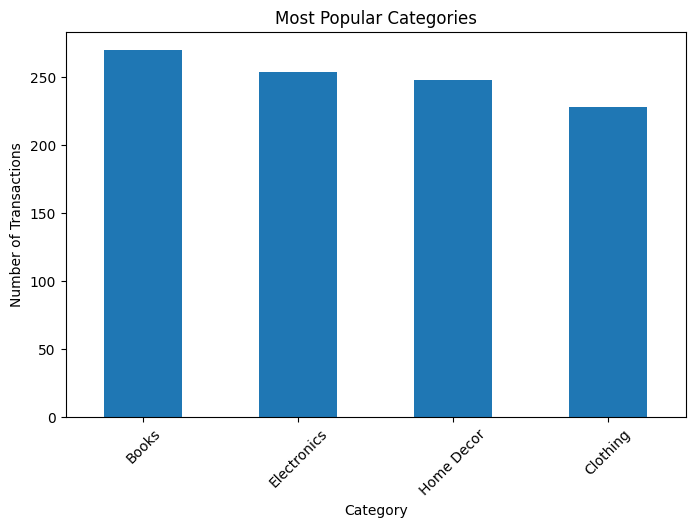

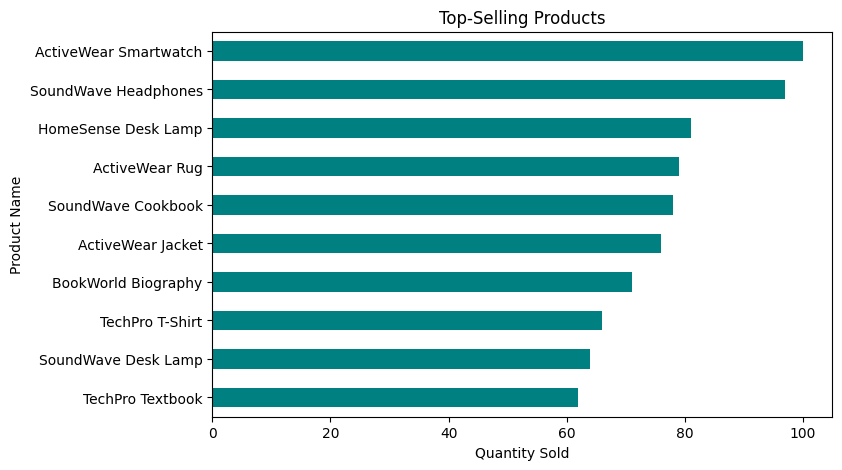

In [5]:
# Plot: Revenue by Region
plt.figure(figsize=(8, 5))
revenue_by_region.plot(kind='bar', title='Revenue by Region', xlabel='Region', ylabel='Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Plot: Most Popular Categories
plt.figure(figsize=(8, 5))
popular_categories.plot(kind='bar', title='Most Popular Categories', xlabel='Category', ylabel='Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Plot: Top-Selling Products
plt.figure(figsize=(8, 5))
top_products.plot(kind='barh', title='Top-Selling Products', xlabel='Quantity Sold', ylabel='Product Name', color='teal')
plt.gca().invert_yaxis()
plt.show()
